In [2]:
## Download relevant data+models for testing MDTerp

import urllib.request
import zipfile
import os

url = "https://figshare.com/ndownloader/articles/30351334/versions/7"
filename = "MDTerp_files.zip"

urllib.request.urlretrieve(url, filename)
print(f"Downloaded {filename}")

zip_path = "MDTerp_files.zip"
extract_dir = "./"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

Downloaded MDTerp_files.zip
Files extracted to: ./


In [8]:
# MDTerp step 1: Load alanine dipeptide in vacuum simulation trajectory (φ, ψ, θ, ω) and convert into sine/cosines since the VAMPNets model was trained using these 8 features

import numpy as np
import os

result_dir = './results_2/'
os.makedirs(result_dir, exist_ok = True)

traj_villin = np.load('MDTerp_files/data_model/SPIB_villin_trajectory.npy')

In [9]:
# MDTerp step 2: Create feature dictionary

numeric_dict = {}
numeric_dict["d_5_62"] = [0]
numeric_dict["d_35_186"] = [1]
numeric_dict["d_35_200"] = [2]
numeric_dict["d_47_116"] = [3]
numeric_dict["d_62_126"] = [4]
numeric_dict["d_74_142"] = [5]
numeric_dict["d_74_169"] = [6]
numeric_dict["d_74_186"] = [7]
numeric_dict["d_74_200"] = [8]
numeric_dict["d_94_162"] = [9]
numeric_dict["d_94_169"] = [10]
numeric_dict["d_94_186"] = [11]
numeric_dict["d_169_235"] = [12]
numeric_dict["d_186_245"] = [13]
numeric_dict["d_200_265"] = [14]
numeric_dict["d_224_275"] = [15]
numeric_dict["d_289_384"] = [16]
numeric_dict["d_310_384"] = [17]
numeric_dict["d_322_401"] = [18]
numeric_dict["d_341_418"] = [19]
numeric_dict["d_365_436"] = [20]
numeric_dict["d_401_474"] = [21]
numeric_dict["d_418_496"] = [22]
numeric_dict["d_436_511"] = [23]
numeric_dict["d_455_533"] = [24]
numeric_dict["d_455_540"] = [25]
numeric_dict["d_474_540"] = [26]
numeric_dict["d_474_559"] = [27]
numeric_dict["d_37_188"] = [28]
numeric_dict["d_171_237"] = [29]
numeric_dict["d_457_542"] = [30]
numeric_dict["d_40_205"] = [31]
numeric_dict["d_79_205"] = [32]
numeric_dict["d_147_441"] = [33]
numeric_dict["d_294_389"] = [34]
numeric_dict["d_425_501"] = [35]
numeric_dict["d_441_516"] = [36]
numeric_dict["d_460_545"] = [37]
numeric_dict["d_479_564"] = [38]

sin_cos_dict = {}
sin_cos_dict["φ_2"] = [39, 61]
sin_cos_dict["φ_3"] = [40, 62]
sin_cos_dict["φ_4"] = [41, 63]
sin_cos_dict["φ_5"] = [42, 64]
sin_cos_dict["φ_6"] = [43, 65]
sin_cos_dict["φ_7"] = [44, 66]
sin_cos_dict["φ_8"] = [45, 67]
sin_cos_dict["φ_12"] = [46, 68]
sin_cos_dict["φ_13"] = [47, 69]
sin_cos_dict["φ_14"] = [48, 70]
sin_cos_dict["φ_15"] = [49, 71]
sin_cos_dict["φ_16"] = [50, 72]
sin_cos_dict["φ_20"] = [51, 73]
sin_cos_dict["φ_21"] = [52, 74]
sin_cos_dict["φ_22"] = [53, 75]
sin_cos_dict["φ_23"] = [54, 76]
sin_cos_dict["φ_24"] = [55, 77]
sin_cos_dict["φ_25"] = [56, 78]
sin_cos_dict["φ_26"] = [57, 79]
sin_cos_dict["φ_27"] = [58, 80]
sin_cos_dict["φ_28"] = [59, 81]
sin_cos_dict["φ_29"] = [60, 82]

sin_cos_dict["ψ_2"] = [83, 105]
sin_cos_dict["ψ_3"] = [84, 106]
sin_cos_dict["ψ_4"] = [85, 107]
sin_cos_dict["ψ_5"] = [86, 108]
sin_cos_dict["ψ_6"] = [87, 109]
sin_cos_dict["ψ_7"] = [88, 110]
sin_cos_dict["ψ_8"] = [89, 111]
sin_cos_dict["ψ_12"] = [90, 112]
sin_cos_dict["ψ_13"] = [91, 113]
sin_cos_dict["ψ_14"] = [92, 114]
sin_cos_dict["ψ_15"] = [93, 115]
sin_cos_dict["ψ_16"] = [94, 116]
sin_cos_dict["ψ_20"] = [95, 117]
sin_cos_dict["ψ_21"] = [96, 118]
sin_cos_dict["ψ_22"] = [97, 119]
sin_cos_dict["ψ_23"] = [98, 120]
sin_cos_dict["ψ_24"] = [99, 121]
sin_cos_dict["ψ_25"] = [100, 122]
sin_cos_dict["ψ_26"] = [101, 123]
sin_cos_dict["ψ_27"] = [102, 124]
sin_cos_dict["ψ_28"] = [103, 125]
sin_cos_dict["ψ_29"] = [104, 126]

In [10]:
# MDTerp step 3: Import MDTerp.base and implement MDTerp using base.run(). Two required arguments are the dataset and the location of a Python function that loads a black-box model. Go to https://github.com/shams-mehdi/MDTerp/tree/main/examples to check how this Python file should be like.

import MDTerp.base as base

model_function_loc = 'MDTerp_files/scripts/MDTerp_script_SPIB_villin.txt'
base.run(traj_villin, model_function_loc, save_dir = result_dir, numeric_dict = numeric_dict, sin_cos_dict = sin_cos_dict , point_max = 50, prob_threshold = 0.49, num_samples = 50000, cutoff = 15)

10-18-25 15:15:09 initialization  INFO     ----------------------------------------------------------------------------------------------------
10-18-25 15:15:09 initialization  INFO     Starting MDTerp...
10-18-25 15:15:09 initialization  INFO     ----------------------------------------------------------------------------------------------------
10-18-25 15:15:09 initialization  INFO     MDTerp result location >>> ./results_2/
10-18-25 15:15:09 initialization  INFO     Defined numeric features >>> 39
10-18-25 15:15:09 initialization  INFO     Defined angle features >>> 0
10-18-25 15:15:09 initialization  INFO     Defined sin_cos features >>> 44
10-18-25 15:15:09 initialization  INFO     Number of samples in blackbox model training data >>> 150000
10-18-25 15:15:09 initialization  INFO     Number of columns in blackbox model training data >>> 127
10-18-25 15:15:09 initialization  INFO     -------------------------------------------------------------------------------------------------

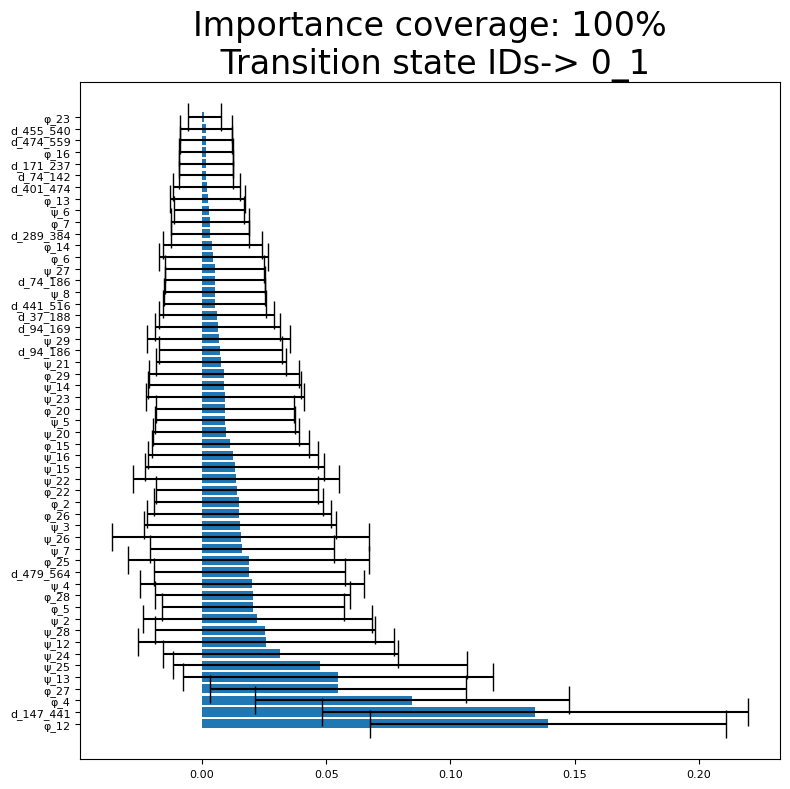

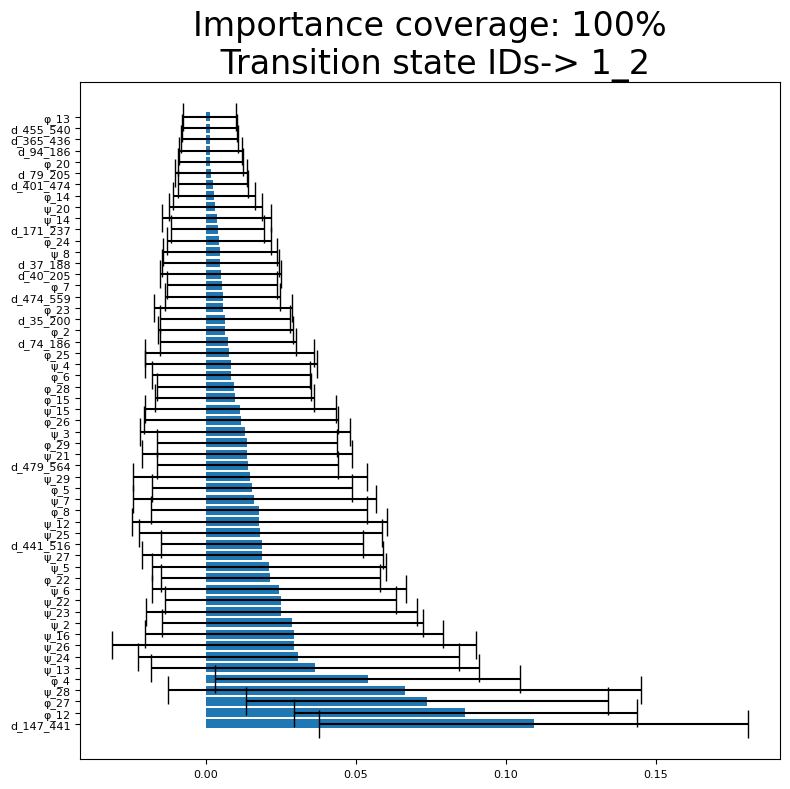

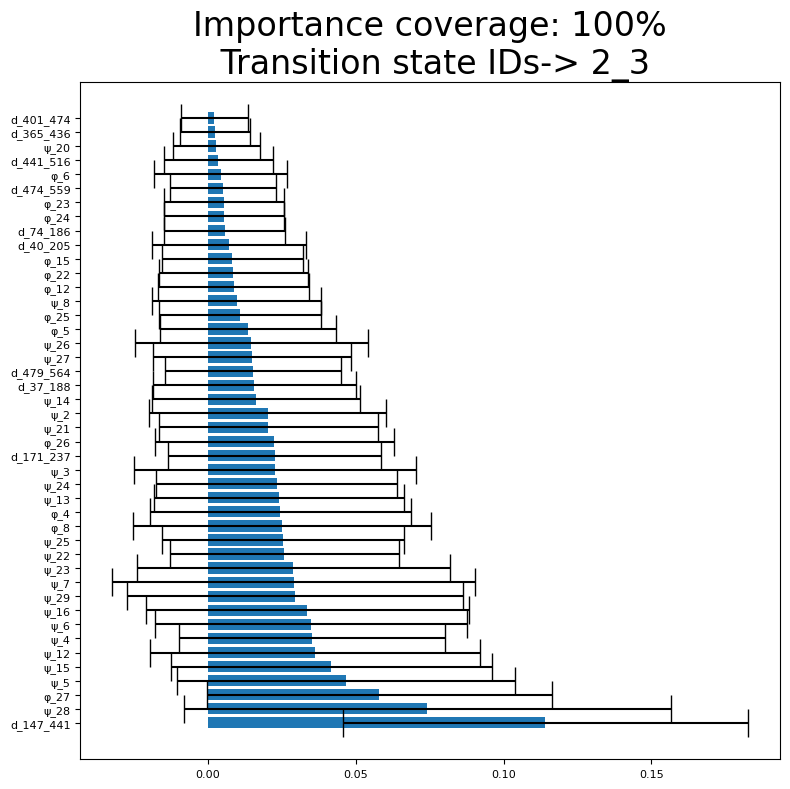

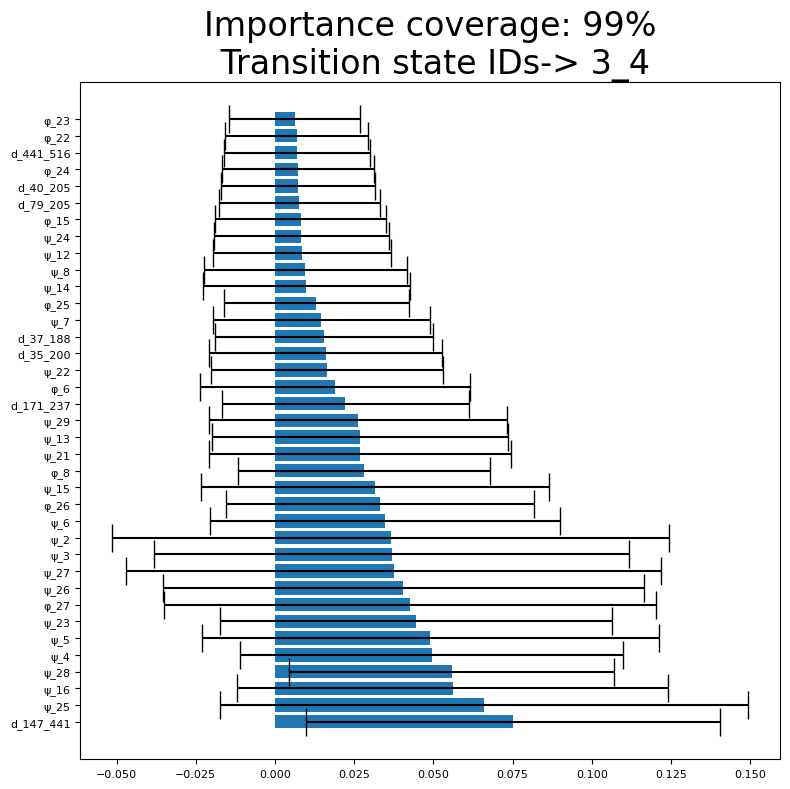

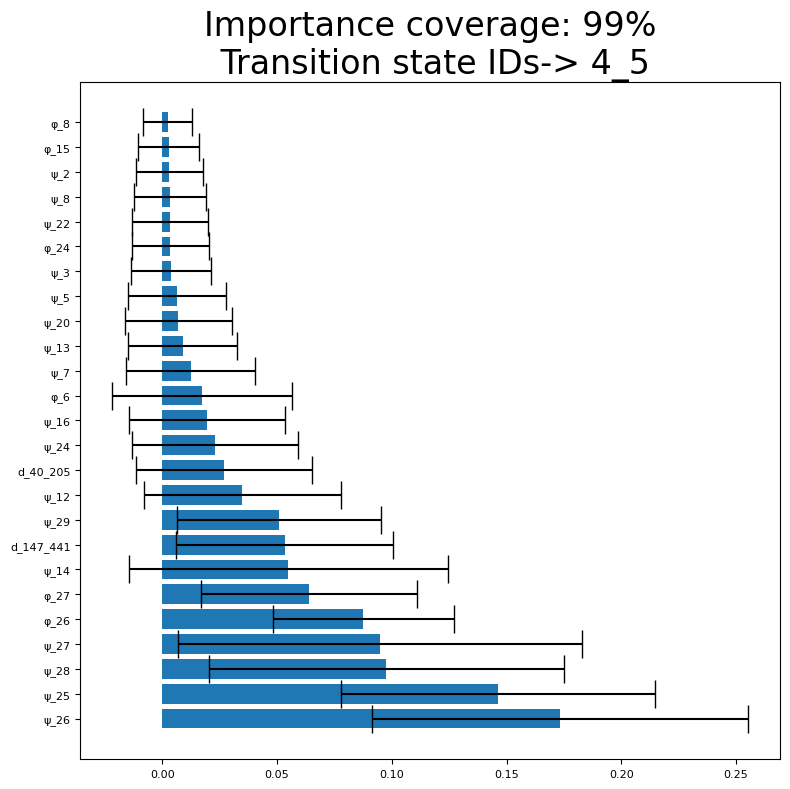

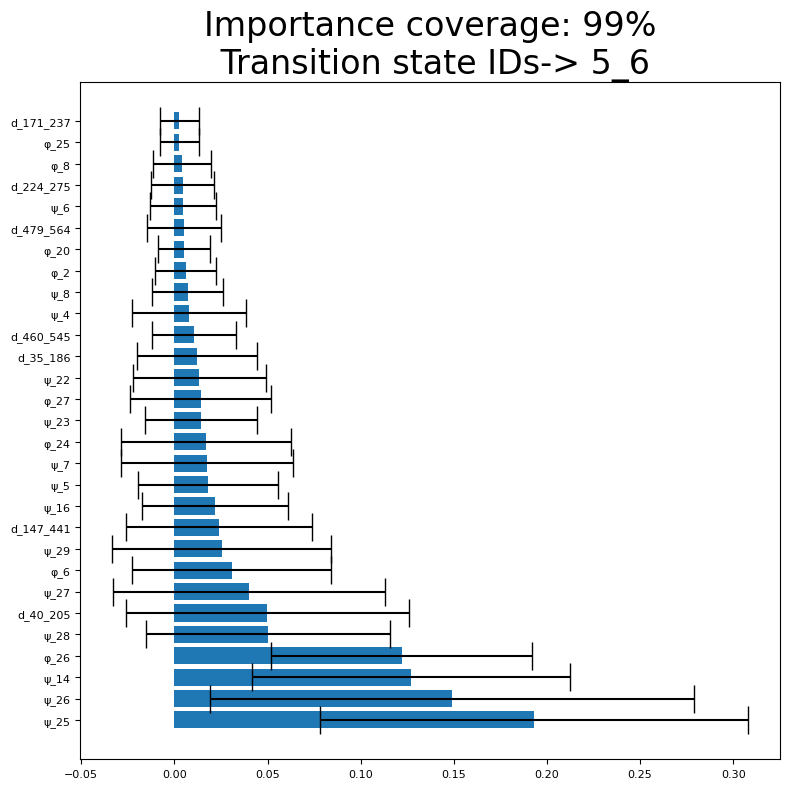

In [11]:
# MDTerp step 3: Summarize feature importance for each of the transition states.
import matplotlib.pyplot as plt
from MDTerp.utils import transition_summary

feature_names_loc = result_dir + 'MDTerp_feature_names.npy'
feature_names = np.load(feature_names_loc)
all_result_loc = result_dir + 'MDTerp_results_all.pkl'

# summary is a dictionary with individual keys for each class transition in the dataset. Each key has the mean and standard deviation of feature importance for all explanations generated for that transition
summary = transition_summary(all_result_loc, importance_coverage = 1.00)

# Loop over all the transitions
for ii in summary:
    ordered_nonzero_indices = np.argsort(summary[ii][0])[::-1][:np.nonzero(summary[ii][0])[0].shape[0]]
    
    ordered_mean = summary[ii][0][ordered_nonzero_indices]
    ordered_std = summary[ii][1][ordered_nonzero_indices]
    
    fig, ax = plt.subplots(figsize = (8,8))
    ax.barh(np.arange(ordered_mean.shape[0]), ordered_mean, xerr = ordered_std, capsize = 10)
    ax.set_title('Importance coverage: ' + str(int(100*np.sum(ordered_mean))) + '%' + '\n Transition state IDs-> ' + ii, fontsize = 24)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_yticks(np.arange(ordered_nonzero_indices.shape[0]))
    ax.set_yticklabels(np.array(feature_names)[ordered_nonzero_indices])
    fig.tight_layout()

In [7]:
# For all the investigated points, fetch n_th dominant features (n = 0 is most dominant).
from MDTerp.utils import dominant_feature
dominant_feature(all_result_loc, n = 0)

{np.int64(113502): np.int64(79),
 np.int64(35982): np.int64(78),
 np.int64(51161): np.int64(79),
 np.int64(29877): np.int64(70),
 np.int64(148628): np.int64(78),
 np.int64(37298): np.int64(79),
 np.int64(34708): np.int64(79),
 np.int64(13058): np.int64(79),
 np.int64(36209): np.int64(79),
 np.int64(36554): np.int64(43),
 np.int64(30236): np.int64(70),
 np.int64(12407): np.int64(79),
 np.int64(35943): np.int64(78),
 np.int64(11104): np.int64(70),
 np.int64(148612): np.int64(78),
 np.int64(34700): np.int64(79),
 np.int64(4338): np.int64(78),
 np.int64(36059): np.int64(78),
 np.int64(105202): np.int64(80),
 np.int64(116380): np.int64(78),
 np.int64(11820): np.int64(78),
 np.int64(37323): np.int64(79),
 np.int64(13362): np.int64(79),
 np.int64(118665): np.int64(79),
 np.int64(4591): np.int64(79),
 np.int64(13411): np.int64(79),
 np.int64(30165): np.int64(70),
 np.int64(12260): np.int64(79),
 np.int64(118487): np.int64(82),
 np.int64(35944): np.int64(78),
 np.int64(14313): np.int64(79),
 np